## Run pre-trained model on a sample image

In [1]:
from transformers import ViTImageProcessor, TFViTForImageClassification
from PIL import Image
import tensorflow as tf

img_path = 'TRAIN_IMAGES/10109_00108093-058_bb2203g0026_004_585572_fr_b2b_pan_fy22q4_sit_esg_maturity_cloud_dcf_300x250.jpg'
image = Image.open(img_path)

feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k', 
                                                        proxies={'https': 'proxy-ir.intel.com:912'})
model = TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224', 
                                                  proxies={'https': 'proxy-ir.intel.com:912'})

inputs = feature_extractor(images=image, return_tensors="tf")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = tf.math.argmax(logits, -1).numpy()[0]
print("Predicted class:", model.config.id2label[predicted_class_idx])


c:\Users\bhegde\codes\MSOAInternGang\aie_venv\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bhegde\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
All model checkpoint layers were used when initializing TFViTForImageClassification.

All the layers of TFViTForImageClassifica

Predicted class: web site, website, internet site, site


## Fine tune pretrained model

In [ ]:
from transformers import ViTImageProcessor, TFViTForImageClassification
from PIL import Image
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf



In [11]:
from src.analysis import aggergate_data
import pandas as pd


stat_df = aggergate_data("data/TRAIN_images_metadata.csv")

[Text(0, 0, '7957'), Text(0, 0, '83')]

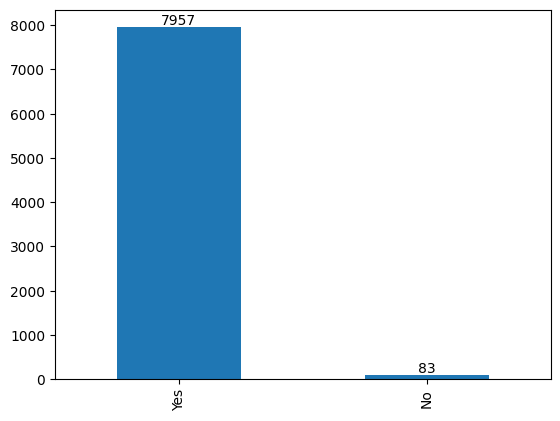

In [13]:
import matplotlib.pyplot as plt
ax = stat_df["POA_attribution"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

[Text(0, 0, '7102'),
 Text(0, 0, '549'),
 Text(0, 0, '256'),
 Text(0, 0, '86'),
 Text(0, 0, '47')]

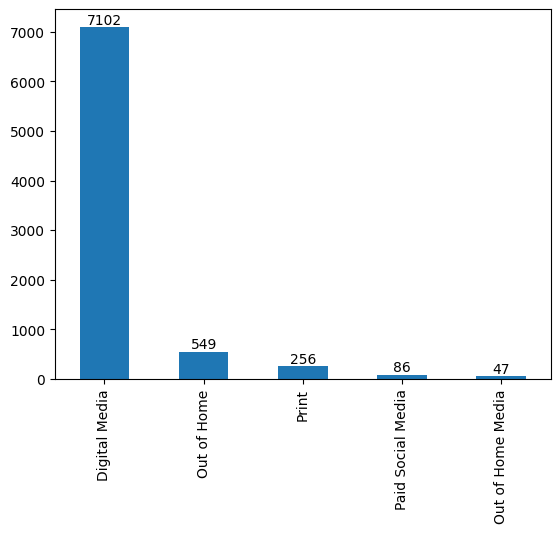

In [14]:
ax = stat_df["activity_category"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

[Text(0, 0, '5115'),
 Text(0, 0, '1185'),
 Text(0, 0, '674'),
 Text(0, 0, '596'),
 Text(0, 0, '158'),
 Text(0, 0, '117'),
 Text(0, 0, '98'),
 Text(0, 0, '97')]

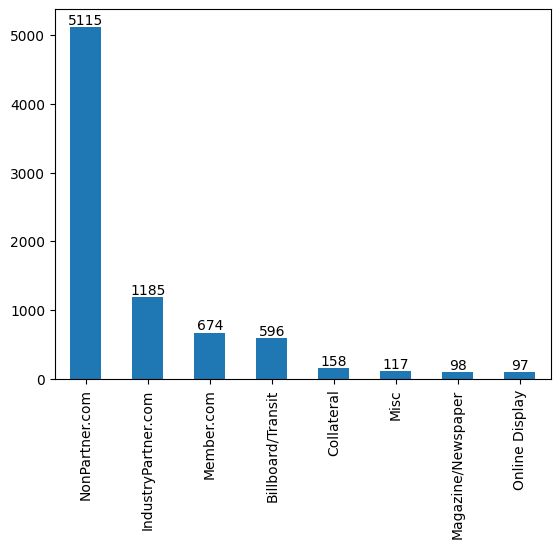

In [15]:
ax = stat_df["activity_type"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [3]:
from src.analysis import get_label_map
import pandas as pd
metadata_file = "data/TRAIN_images_metadata.csv"

src_df = pd.read_csv(metadata_file)

# columns: image_name,ref_id, POA_attribution,activity_category,activity_type
stat_df = src_df.groupby("ref_id").agg(
    {
        "image_name": len,
    }
)
agg_data = pd.DataFrame(
    columns=[
        "ref_id",
        "POA_attribution",
        "activity_category",
        "activity_type",
    ]
)

agg_data["ref_id"] = stat_df.index
label_map = get_label_map()
print(label_map)
base_poa = label_map["POA_attribution_map"]["Yes"]
base_ac = label_map["activity_type_map"]["NonPartner.com"]
base_at = label_map["activity_category_map"]["Digital Media"]

agg_data["POA_attribution"].fillna(base_poa, inplace=True)
agg_data["activity_category"].fillna(base_ac, inplace=True)
agg_data["activity_type"].fillna(base_at, inplace=True)

agg_data.head()

{'POA_attribution_map': {'No': 0, 'Yes': 1}, 'activity_category_map': {'Digital Media': 0, 'Paid Social Media': 1, 'Print': 2, 'Out of Home Media': 3, 'Out of Home': 4}, 'activity_type_map': {'NonPartner.com': 0, 'Member.com': 1, 'Online Display': 2, 'Magazine/Newspaper': 3, 'Billboard/Transit': 4, 'Collateral': 5, 'Misc': 6, 'IndustryPartner.com': 7}}


,ref_id,POA_attribution,activity_category,activity_type
0,00060420-005,1,0,0
1,00060435-003,1,0,0
2,00060864-006,1,0,0
3,00066206-002,1,0,0
4,00069748-002,1,0,0
